@Student Name: Garret Molloy
@Student ID: 9021906
@Project Group: 2.3

# Title: Predicting Diabetic Retinopathy

## Using Binary Classification & Logistic Regression

Datasource Name: Diabetic Retinopathy Debrecen Data Set Data Set 
Website: The UCI Machine Learning Repository 
Datasource: http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set#


## Load Data

In [109]:
from pandas import read_csv

df = read_csv("messidor_features.csv")
dataset = df.values

## Information about my Dataset

This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27. 


### Data Pre-Processing

In [118]:
# Let's see some of the data
print( df.head(5))

   id  1   2   3   4   5   6   7          8          9         10        11  \
0   1  1  22  22  22  19  18  14  49.895756  17.775994   5.270920  0.771761   
1   2  1  24  24  22  18  16  13  57.709936  23.799994   3.325423  0.234185   
2   3  1  62  60  59  54  47  33  55.831441  27.993933  12.687485  4.852282   
3   4  1  55  53  53  50  43  31  40.467228  18.445954   9.118901  3.079428   
4   5  1  44  44  44  41  39  27  18.026254   8.570709   0.410381  0.000000   

         12        13        14        15        16        17  18  Class  
0  0.018632  0.006864  0.003923  0.003923  0.486903  0.100025   1      0  
1  0.003903  0.003903  0.003903  0.003903  0.520908  0.144414   0      0  
2  1.393889  0.373252  0.041817  0.007744  0.530904  0.128548   0      1  
3  0.840261  0.272434  0.007653  0.001531  0.483284  0.114790   0      0  
4  0.000000  0.000000  0.000000  0.000000  0.475935  0.123572   0      1  


In [122]:
datashape = df.shape
print("Data has", datashape[0], "samples with", datashape[1], "features")

Data has 1147 samples with 19 features


#### Let's Remove Features known to be redundant

In [120]:
# Remove 'id' field as it contributes nothing
df = df.drop('id',1)

datashape = df.shape
print("Data has", datashape[0], "samples with", datashape[1], "features")

KeyError: "['id'] not found in axis"

In [116]:
# Feature [0] is = 1 where we had accurate readigs and 0 where we had inaccurate readings
# Goal to remove bad readings form samples
print("Counts of Quality Assessment before Cleaning: \n", df['0'].value_counts())
#print("Counts of pre-screening before Cleaning: \n", df['1'].value_counts())
df_quality_equals_0 = df[df['0']==0]
print("Hits for pre-screen == 0: ", df_quality_equals_0['Class'].value_counts())

# No Hits where Quality Assessment == 0, so we can confidently remove these rows as outliers

df = df[df['0'] != 0]

print("Counts of quality assessment after Cleaning: \n", df['0'].value_counts())

# We can drop this column now - '0'
df = df.drop('0', 1)

datashape = df.shape
print("\nData now has ", datashape[0], " samples with ", datashape[1], " features")

KeyError: '0'

In [28]:
# Check for missing Values
print(df.apply(lambda x: sum(x.isnull()), axis=0))

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64


No Missing Data - Unforuntateley nothing to fix!

#### Feature 20 is the Target to be removed

Check Correlation

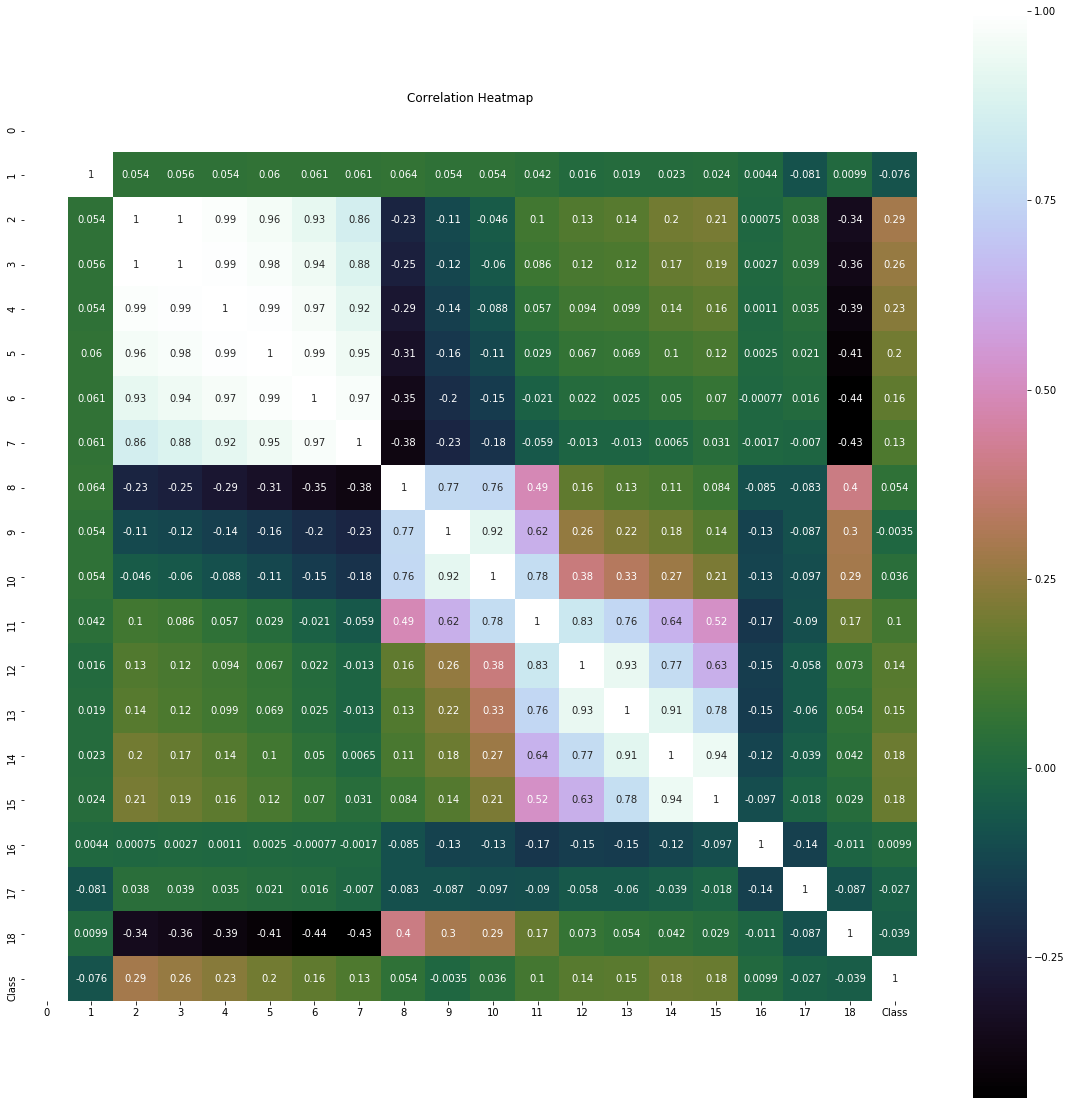

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns  

import os  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from random import sample  
from sklearn.linear_model import LogisticRegression  
from sklearn import tree  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import cross_val_score 
from sklearn import metrics  
from IPython.display import Image  
from pydotplus import graph_from_dot_data  

# As seen on Article: https://lukesingham.com/whos-going-to-leave-next/

# Useful visualization for Correlation
#df = df.drop('Class', 1)
correlation = df.corr()  
plt.figure(figsize=(20, 20))  
plt.title("Correlation Heatmap")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix') 

## Prepare Data for Training & Evaluation

In [123]:
from sklearn.model_selection import train_test_split

# Split Features and Target Classification
X = df.drop('Class', 1)
y = df.Class

# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

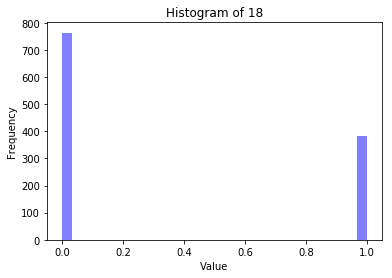

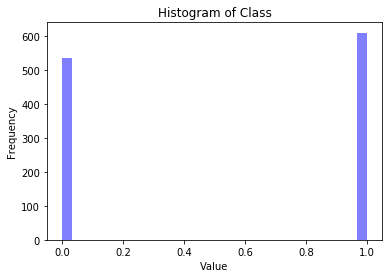

16     36
12     29
17     27
19     26
15     24
11     22
49     21
48     21
41     21
24     21
13     21
20     20
14     20
8      19
21     18
25     18
9      18
44     18
53     18
10     18
56     17
5      17
18     17
34     16
52     16
60     16
37     16
43     16
64     15
50     15
       ..
77      4
87      4
68      4
78      3
91      3
105     3
32      3
80      3
102     3
86      3
103     2
88      2
84      2
95      2
114     2
107     2
99      2
82      2
92      2
137     1
126     1
141     1
93      1
101     1
98      1
96      1
94      1
147     1
83      1
151     1
Name: 2, Length: 110, dtype: int64
1    611
0    536
Name: Class, dtype: int64


In [134]:
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color="blue", alpha=0.5, bins=30)
    plt.title("Histogram of {}".format(x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram(X['18'])
plot_histogram(y)
# print(X['16'].value_counts())

def plot(z):
    plt.title("Plot of Values of {}".format(z.name))
    plt.plot(z)
    plt.show()
    
# df = df[df.line_race != 0]
# df.loc[(df['age'] == 21) & df['favorite_color'].isin(array)]
print( df['2'].value_counts())
print( y.value_counts())

### PCA Feature Reduction

In [135]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(X_pca.head(5))

           0          1         2         3         4         5         6  \
0   1.975022 -35.494953  0.520395 -0.433825 -0.108861 -0.068470  0.370984   
1   9.492731 -30.587012  2.067928  2.106179 -4.492905  1.807916  1.913573   
2 -30.370004  41.713660  6.143863  0.342355  1.605202  0.468081 -2.578551   
3 -39.576564  21.471805  2.343558 -0.814380  2.512138 -0.506591 -2.689190   
4 -52.087692  -8.440888 -1.181991 -2.449383 -0.469157  0.492814 -2.535597   

          7         8         9  
0  0.445431  0.913606 -0.616303  
1  0.862894  1.235712  0.002486  
2  1.102705 -0.127074 -0.653418  
3  1.210790 -1.160017 -0.543632  
4 -0.254886  0.981048 -0.375620  


In [50]:
import sklearn.feature_selection
from sklearn.model_selection import train_test_split

# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

select = sklearn.feature_selection.SelectKBest(k=12)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc




D:\Python\Miniconda\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [51]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

auc_processed = find_model_perf(X_train, y_train, X_test, y_test)
print(auc_processed)

0.8090659340659341
0.8168721522380059


D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
import sklearn.feature_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
#print(clf.predict(X_test[0]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Data is not great for showing off pre-prcessing
As it is already all numeric and has no missing data
There may be a few outliers I could remove

But would prefer something more challenging

k=10
0.8149624765478425
0.8168721522380059

k=12
0.8090659340659341
0.8168721522380059

